# Données du mélange propylène glycole et eau 

In [1]:
import thermo as th 
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import *
sp.init_printing(use_latex=True)

#propylène glycole : 4254-14-2 a 30 % 
#eau : 7732-18-5

T = -3.5 + 273.15 
P = 101325

Mix = th.Mixture(('4254-14-2', '7732-18-5'), zs = (0.30,0.70), T=T, P=P)
eau = th.Mixture(('4254-14-2', '7732-18-5'), zs = (0.0,0.100), T=T, P=P)

print('Le CP du mélange est de ', Mix.Cp, 'J/Kg * K ')

print('le k du mélange est de ', Mix.k, 'W/mK ')

print('le H du mélange est de ', Mix.H, 'W/m^2K ')




Le CP du mélange est de  2608.7166100707627 J/Kg * K 
le k du mélange est de  0.2363542976456611 W/mK 
le H du mélange est de  -1737689.5461502841 W/m^2K 


# Fermenteur
## Données pour bilan d'énergie
### A : Surface de contact 

In [2]:
##Paroi extérieur

r_ext = 39.5625/2
h = 60

A_extpo = 2 * np.pi * r_ext * h 
A_ext = A_extpo / 1550.0031 # convertion po^2 en m^2

print ("Le A pour la paroi extérieur est de", A_ext, "m^2")

r_in = 35.25/2
h = 60

A_inpo = 2 * np.pi * r_in * h 
A_in = A_inpo / 1550.0031

print ("Le A pour la paroi intérieur est de", A_in, "m^2")

Le A pour la paroi extérieur est de 4.811187514049986 m^2
Le A pour la paroi intérieur est de 4.286745273181977 m^2


### L : épaisseur du mur

In [3]:
L_po = r_ext-r_in 
L_m = L_po * 0.0254
print("l'épaisseur de la double paroi est de", L_m, "m")

l'épaisseur de la double paroi est de 0.05476875 m


## Bilan 
voir pdf pour la pose du problème et explication des hypothèses

In [12]:
qdot,mdot,t,U,A,Tb,Tpg,Cp,Tout,Tin,L,kp,hb, Aint, Aext, Rtot, rho=sp.symbols("q_dot m_dot t U A Tb Tpg Cp T_out T_in L k_p h_b A_int A_ext R_tot rho")


In [16]:
eq1 = (Rtot,(L/(kp*Aext) + 1/(hb*Aint))) 
display(eq1)
eq2 = (Rtot, 1/(U*A))
eq3 = (A*U, 1/Rtot)
display (eq2, 'donc', eq3)

'donc'

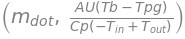

In [13]:
#Si on modifie la formule donnée dans lénoncé 
eq3 = (mdot,(U*A*(Tb-Tpg))/(Cp*(Tout-Tin)))
display(eq3)


In [15]:
#masse vers volume

eq4 =(qdot, mdot/rho)
display (eq4)

In [ ]:
#changer en gallon par minute
